1. Загрузите данные кликстрима из файла click_stream.csv себе в Jupyter и рассчитайте, сколько клиентов на какой стадии воронки находится.

In [9]:
import csv
import pprint
stats = {}
with open('click_stream.csv') as f:
    csv_reader = csv.DictReader(f, fieldnames=['ID','page','date'])
    for row in csv_reader:
        page = row['page']
        stats.setdefault(page, 0)
        stats[page] += 1
pprint.pprint(stats)


{'1_home_page': 90400,
 '2_search_page': 45200,
 '3_payment_page': 6030,
 '4_payment_confirmation_page': 452}


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('click_stream.csv', header=None, names = ['ID','page','date', 'device', 'gender'], parse_dates= ['date'])
df.head()

,ID,page,date,device,gender
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female


In [40]:
df.iloc[0, 2].year

2015

In [28]:
funnel_df = df.groupby('page').agg(amount = ('gender', 'count'))
funnel_df

,amount
page,
1_home_page,90400
2_search_page,45200
3_payment_page,6030
4_payment_confirmation_page,452


In [29]:
funnel_df.iloc[0, 0]

90400

In [32]:

(funnel_df / funnel_df.iloc[0, 0] * 100).apply(lambda x: round(x, 2))

,amount
page,
1_home_page,100.00
2_search_page,50.00
3_payment_page,6.67
4_payment_confirmation_page,0.50


2. Загрузите данные из файла click_stream.csv. Постройте воронку по каждому доступному месяцу. Сравните воронки. Они одинаковые, или меняются?  Проведите только рассчет, визуализировать воронку не обязательно.

In [41]:
df.head()

,ID,page,date,device,gender
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female


In [44]:
df_funnel = df.groupby([df.date.dt.to_period('M'), 'page']).agg(amount=('gender', 'count'))
df_funnel

amount
date    page                               
2015-01 1_home_page                   22600
        2_search_page                 13554
        3_payment_page                 2390
        4_payment_confirmation_page     189
2015-02 1_home_page                   22600
        2_search_page                 13687
        3_payment_page                 2412
        4_payment_confirmation_page     173
2015-03 1_home_page                   22600
        2_search_page                  8879
        3_payment_page                  631
        4_payment_confirmation_page      44
2015-04 1_home_page                   22600
        2_search_page                  9080
        3_payment_page                  597
        4_payment_confirmation_page      46

In [84]:
for el in df_funnel.groupby('date'):
    print((el[1] / el[1].iloc[0,0] * 100).apply(lambda x: round(x, 2)))

                                     amount
date    page                               
2015-01 1_home_page                  100.00
        2_search_page                 59.97
        3_payment_page                10.58
        4_payment_confirmation_page    0.84
                                     amount
date    page                               
2015-02 1_home_page                  100.00
        2_search_page                 60.56
        3_payment_page                10.67
        4_payment_confirmation_page    0.77
                                     amount
date    page                               
2015-03 1_home_page                  100.00
        2_search_page                 39.29
        3_payment_page                 2.79
        4_payment_confirmation_page    0.19
                                     amount
date    page                               
2015-04 1_home_page                  100.00
        2_search_page                 40.18
        3_payment_page          

In [45]:
df_funnel_from_home = df_funnel.unstack(level=1).apply(lambda x: round(x / x[0] * 100, 2), axis=1).droplevel(0, axis=1)
df_funnel_from_home

page,1_home_page,2_search_page,3_payment_page,4_payment_confirmation_page
date,,,,
2015-01,100.0,59.97,10.58,0.84
2015-02,100.0,60.56,10.67,0.77
2015-03,100.0,39.29,2.79,0.19
2015-04,100.0,40.18,2.64,0.20


Видим, что в апреле и мае у нас идет падение при переходе с домашней страницы в поиск

<Axes: xlabel='date'>

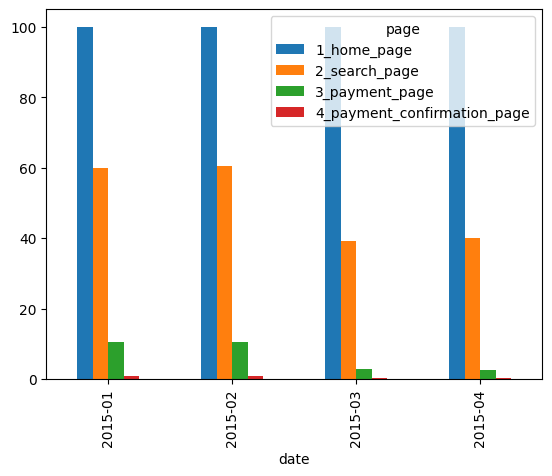

In [6]:
df_funnel_from_home.plot.bar()

Посмотрим отдельно на конверсию в продажу

<Axes: xlabel='date'>

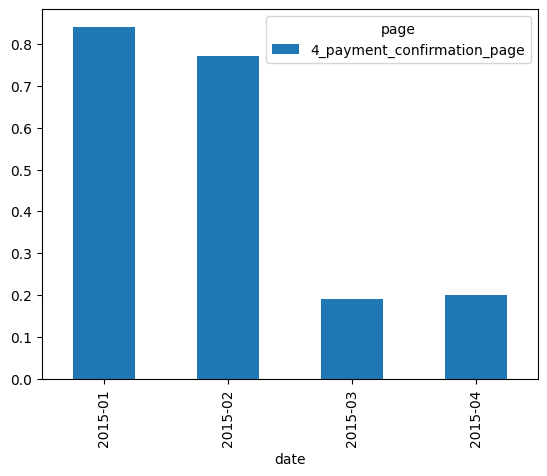

In [42]:
df_funnel_from_home[['4_payment_confirmation_page']].plot.bar()

In [51]:
df_funnel_from_search = df_funnel.unstack(level=1).droplevel(0, axis=1).drop('1_home_page', axis=1).apply(lambda x: round(x / x[0] * 100, 2), axis=1)
df_funnel_from_search

page,2_search_page,3_payment_page,4_payment_confirmation_page
date,,,
2015-01,100.0,17.63,1.39
2015-02,100.0,17.62,1.26
2015-03,100.0,7.11,0.50
2015-04,100.0,6.57,0.51


Видим, что в марте и апреле проблема не только при переходе с домашней страницы в поиск,  
но и при переходе с поиска в оплату.
Следовательно у нас проблема на всех уровнях воронки

In [52]:
df.head()

,ID,page,date,device,gender
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female


In [53]:
funnel_df_with_devices = df.groupby(['device', df.date.dt.to_period('M'), 'page']).agg(amount=('gender', 'count'))
funnel_df_with_devices

amount
device  date    page                               
Desktop 2015-01 1_home_page                   15050
                2_search_page                  7529
                3_payment_page                 1221
                4_payment_confirmation_page      60
        2015-02 1_home_page                   15050
                2_search_page                  7632
                3_payment_page                 1191
                4_payment_confirmation_page      54
        2015-03 1_home_page                   15050
                2_search_page                  7370
                3_payment_page                  296
                4_payment_confirmation_page      14
        2015-04 1_home_page                   15050
                2_search_page                  7569
                3_payment_page                  302
                4_payment_confirmation_page      22
Mobile  2015-01 1_home_page                    7550
                2_search_page                  6025
                3_payment_page                 1169
                4_payment_confirmation_page     129
        2015-02 1_home_page                    7550
                2_search_page                  6055
                3_payment_page                 1221
                4_payment_confirmation_page     119
        2015-03 1_home_page                    7550
                2_search_page                  1509
                3_payment_page                  335
                4_payment_confirmation_page      30
        2015-04 1_home_page                    7550
                2_search_page                  1511
                3_payment_page                  295
                4_payment_confirmation_page      24

In [59]:
df_funnel_from_home_Desktop = funnel_df_with_devices.loc['Desktop'].unstack(level=1).apply(lambda x: round(x / x[0] * 100, 2), axis=1).droplevel(0, axis=1)
df_funnel_from_home_Desktop

page,1_home_page,2_search_page,3_payment_page,4_payment_confirmation_page
date,,,,
2015-01,100.0,50.03,8.11,0.40
2015-02,100.0,50.71,7.91,0.36
2015-03,100.0,48.97,1.97,0.09
2015-04,100.0,50.29,2.01,0.15


In [60]:
df_funnel_from_home_Mobile = funnel_df_with_devices.loc['Mobile'].unstack(level=1).apply(lambda x: round(x / x[0] * 100, 2), axis=1).droplevel(0, axis=1)
df_funnel_from_home_Mobile

page,1_home_page,2_search_page,3_payment_page,4_payment_confirmation_page
date,,,,
2015-01,100.0,79.80,15.48,1.71
2015-02,100.0,80.20,16.17,1.58
2015-03,100.0,19.99,4.44,0.40
2015-04,100.0,20.01,3.91,0.32


Видим, что на десктопе у нас проблема при переходе с поиска на страницу оплаты.  
А у мобильной версии проблема с переходом с домашней страницы в поиск

Посмотрим как меняется ситуация в разрезе пола

In [61]:
df.head()

,ID,page,date,device,gender
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female


In [149]:
df_pivot = df.pivot_table(index=df.date.dt.to_period('M'), columns=['gender', 'device', 'page'], values='ID', aggfunc='count')
df_pivot

gender       Female                                                           \
device      Desktop                                                            
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01        7546          3851            625                          33   
2015-02        7448          3800            605                          26   
2015-03        7512          3707            162                           6   
2015-04        7491          3733            138                           9   

gender                                                                        \
device       Mobile                                                            
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01        3868          3062            618                          76   
2015-02        3751          3020            630                          60   
2015-03        3738           747            175                          20   
2015-04        3721           756            147                          11   

gender         Male                                                           \
device      Desktop                                                            
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01        7504          3678            596                          27   
2015-02        7602          3832            586                          28   
2015-03        7538          3663            134                           8   
2015-04        7559          3836            164                          13   

gender                                                                        
device       Mobile                                                           
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page  
date                                                                          
2015-01        3682          2963            551                          53  
2015-02        3799          3035            591                          59  
2015-03        3812           762            160                          10  
2015-04        3829           755            148                          13

In [144]:
df_pivot[('Female', 'Desktop')]

page,1_home_page,2_search_page,3_payment_page,4_payment_confirmation_page
date,,,,
2015-01,7546,3851,625,33
2015-02,7448,3800,605,26
2015-03,7512,3707,162,6
2015-04,7491,3733,138,9


In [99]:
df_pivot.columns.levels[0]

Index(['Female', 'Male'], dtype='object', name='gender')

In [150]:
for gender in df_pivot.columns.levels[0]:
    for device in df_pivot.columns.levels[1]:
        df_pivot[(gender, device)] = df_pivot[(gender, device)].apply(lambda x: round(x / x[0] * 100, 2), axis=1).copy()
df_pivot

gender       Female                                                           \
device      Desktop                                                            
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01       100.0         51.03           8.28                        0.44   
2015-02       100.0         51.02           8.12                        0.35   
2015-03       100.0         49.35           2.16                        0.08   
2015-04       100.0         49.83           1.84                        0.12   

gender                                                                        \
device       Mobile                                                            
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01       100.0         79.16          15.98                        1.96   
2015-02       100.0         80.51          16.80                        1.60   
2015-03       100.0         19.98           4.68                        0.54   
2015-04       100.0         20.32           3.95                        0.30   

gender         Male                                                           \
device      Desktop                                                            
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01       100.0         49.01           7.94                        0.36   
2015-02       100.0         50.41           7.71                        0.37   
2015-03       100.0         48.59           1.78                        0.11   
2015-04       100.0         50.75           2.17                        0.17   

gender                                                                        
device       Mobile                                                           
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page  
date                                                                          
2015-01       100.0         80.47          14.96                        1.44  
2015-02       100.0         79.89          15.56                        1.55  
2015-03       100.0         19.99           4.20                        0.26  
2015-04       100.0         19.72           3.87                        0.34

In [160]:
pd.concat([df_pivot[('Female', 'Desktop')], df_pivot[('Male', 'Desktop')]], axis=1, keys=['Female', 'Male'])

Female                                                           \
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01       100.0         51.03           8.28                        0.44   
2015-02       100.0         51.02           8.12                        0.35   
2015-03       100.0         49.35           2.16                        0.08   
2015-04       100.0         49.83           1.84                        0.12   

               Male                                                           
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page  
date                                                                          
2015-01       100.0         49.01           7.94                        0.36  
2015-02       100.0         50.41           7.71                        0.37  
2015-03       100.0         48.59           1.78                        0.11  
2015-04       100.0         50.75           2.17                        0.17

In [163]:
pd.concat([df_pivot[('Female', 'Mobile')], df_pivot[('Male', 'Mobile')]], axis=1, keys=['Female', 'Male'])

Female                                                           \
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01       100.0         79.16          15.98                        1.96   
2015-02       100.0         80.51          16.80                        1.60   
2015-03       100.0         19.98           4.68                        0.54   
2015-04       100.0         20.32           3.95                        0.30   

               Male                                                           
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page  
date                                                                          
2015-01       100.0         80.47          14.96                        1.44  
2015-02       100.0         79.89          15.56                        1.55  
2015-03       100.0         19.99           4.20                        0.26  
2015-04       100.0         19.72           3.87                        0.34

По таблицам видно, что нет разницы между мужчинами и женщинами
Посмотрим без учета устроств в разрезе пола

In [170]:
df_pivot_gender = df.pivot_table(index=df.date.dt.to_period('M'), columns=['gender', 'page'], values='device', aggfunc='count')
df_pivot_gender

gender       Female                                                           \
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01       11414          6913           1243                         109   
2015-02       11199          6820           1235                          86   
2015-03       11250          4454            337                          26   
2015-04       11212          4489            285                          20   

gender         Male                                                           
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page  
date                                                                          
2015-01       11186          6641           1147                          80  
2015-02       11401          6867           1177                          87  
2015-03       11350          4425            294                          18  
2015-04       11388          4591            312                          26

In [174]:
for col in df_pivot_gender.columns.levels[0]:
    df_pivot_gender[col] = df_pivot_gender[col].apply(lambda x: round(x / x[0] * 100, 2), axis=1)
df_pivot_gender

gender       Female                                                           \
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page   
date                                                                           
2015-01       100.0         60.57          10.89                        0.95   
2015-02       100.0         60.90          11.03                        0.77   
2015-03       100.0         39.59           3.00                        0.23   
2015-04       100.0         40.04           2.54                        0.18   

gender         Male                                                           
page    1_home_page 2_search_page 3_payment_page 4_payment_confirmation_page  
date                                                                          
2015-01       100.0         59.37          10.25                        0.72  
2015-02       100.0         60.23          10.32                        0.76  
2015-03       100.0         38.99           2.59                        0.16  
2015-04       100.0         40.31           2.74                        0.23

Делаем вывод, что нет зависимости от пола в проблеме с конверсией в воронке